## Daten aus API einlesen
Diesdasananas

Api Dokumentation gemäss: https://doc.iofrog.com/apidocumentation/api.html
Postman requests: https://www.getpostman.com/collections/eb80441a4500fd9a0634

In [1]:
# packages import
import requests
import json
import pandas as pd


Login to api

In [2]:
url = "https://www.iofrog.com/api/v2/auth/signin/"

payload = json.dumps({
  "username": "pascal.berger@students.fhnw.ch",
  "password": "123321"
})
headers = {
  'Content-Type': 'application/json',
  'Cookie': ''
}

login_response = requests.request("POST", url, headers=headers, data=payload)
#print(login_response.text)


In [3]:
login_data = pd.read_json(login_response.text)
access_token = login_data.loc['accessToken', 'token']
login_data

,user,token
firstName,Pascal,NaN
lastName,Berger,NaN
isActivated,True,NaN
level,expert,NaN
partner,heliot,NaN
lang,en,NaN
timeZone,Europe/Berlin,NaN
units,"{'temperature': 'C', 'system': 'M'}",NaN
accessToken,NaN,eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpZCI6I...
refreshToken,NaN,6079899d1ef743213d970ac2.2b39351f772d0e6f794a8...


get devices data

In [4]:
url = "https://www.iofrog.com/api/v2/devices/dashboard"

payload = json.dumps([
  {
    "data": [],
    "count": 2,
    "meta": {}
  }
])
headers = {
  'Authorization': 'Bearer ' + access_token,
  'Content-Type': 'application/json',
  'Cookie': ''
}

devices_response = requests.request("GET", url, headers=headers, data=payload)
#print(devices_response.text)


In [5]:
#print(devices_response.text)
#device_data = pd.read_json(devices_response.text)

device_dict = json.loads(devices_response.text)
device_data = pd.DataFrame.from_dict(device_dict['data'])
#device_data = pd.json_normalize(device_dict)
#device_dict['data']
device_data

,id,groupId,name,typeId,modeId,downlinkData,active,location,viewConfig,status,subscriptions,lastDataMessages,trackedKeys,badges,lastDataMessage,lastSourceBasedLocation
0,2203AF9,60476e95362d421c28ee0058,SimplePack POC_02203AF9 TeamA,simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050c0467d354e09ee4aa73e', 'provider...","[{'_id': '607906bc4568aa5ea543c9e0', 'keys': [...",[],[],"{'_id': '607906bc4568aa5ea543c9e0', 'keys': [{...",NaN
1,1F2504E,60476e95362d421c28ee0058,Türe Beschleunigung (PTH-04E),simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050bd897d354e09ee4a5d37', 'provider...","[{'_id': '6079876f1ef743213d96b3ac', 'keys': [...",[],[],"{'_id': '6079876f1ef743213d96b3ac', 'keys': [{...",NaN
2,2203AFA,60476e95362d421c28ee0058,Türe Magnet aussen (POC-AFA),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489ad5362d421c28f49667', 'provider...","[{'_id': '60793e43100aad2989c9ebba', 'keys': [...",[],[],"{'_id': '60793e43100aad2989c9ebba', 'keys': [{...","{'geoplaces': [], '_id': '605b4291f4e46133dc9b..."
3,2203AAB,60476e95362d421c28ee0058,Türe Magnet innen (POC-AAB),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489bab362d421c28f49a02', 'provider...","[{'_id': '607983f6d131ef466437b4da', 'keys': [...",[],[],"{'_id': '607983f6d131ef466437b4da', 'keys': [{...","{'geoplaces': [], '_id': '6059fbafb3ae30315afb..."
4,1F25047,60476e95362d421c28ee0058,Türriegel Beschl. (PTH-047),simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489b3f362d421c28f498b2', 'provider...","[{'_id': '607987701ef743213d96b404', 'keys': [...",[],[],"{'_id': '607987701ef743213d96b404', 'keys': [{...","{'geoplaces': [], '_id': '6058b9d703380b4c4fd1..."
5,2203ACB,60476e95362d421c28ee0058,Türriegel Magnet (POC-ACB),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489995362d421c28f48edd', 'provider...","[{'_id': '60797e661ef743213d9534cd', 'keys': [...",[],[],"{'_id': '60797e661ef743213d9534cd', 'keys': [{...","{'geoplaces': [], '_id': '605b68f2f4e46133dc9e..."


In [6]:
url = "https://www.iofrog.com/api/v2/devices/2203AFA/messages/"

payload = json.dumps({
  "data": [
    {
      "_id": "1f704bc5-5055-43eb-a851-c87b6b0bf7b9",
      "isAlarm": False,
      "isDismissed": False,
      "timestamp": 1584093653,
      "type": "data_uplink",
      "seqNumber": 1,
      "keys": [
        {
          "isCode": False,
          "_id": "1111111111111111111111",
          "key": "key",
          "value": "value",
          "keyLocale": "Klíč",
          "valueLocale": "Hodnota",
          "color": "alarm",
          "icon": "icon name (from fontAwesome)"
        }
      ]
    }
  ],
  "count": 1
})
headers = {
  'Authorization': 'Bearer ' + access_token,
  'Content-Type': 'application/json',
  'Cookie': ''
}

message_response = requests.request("GET", url, headers=headers, data=payload)

# print(response.text)


In [7]:
# data prep


message_dict = json.loads(message_response.text)
#print(message_dict['data'])
message_data = pd.DataFrame.from_dict(message_dict['data'])

message_data = message_data.drop(columns=['keys'])

message_data_keys = pd.json_normalize(message_dict['data'], record_path='keys', record_prefix='keys_', meta='_id')
message_data_keys = message_data_keys.pivot(index=['_id'], columns='keys_key', values='keys_value')
message_data_keys.reset_index(inplace=True)
message_data_keys = message_data_keys.groupby('_id').sum()
#print(message_data_keys)
# join df's
message_data = message_data.merge(message_data_keys, on=['_id'], how='left', indicator=True)

message_data



,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,firmware,...,hw_config_has_leakage,hw_config_has_led,hw_config_has_light,hw_config_has_reed,hw_config_has_wifi,hw_config_temp_type,mode,temperature,version,_merge
0,60793e43100aad2989c9ebba,1618558529,data_bidir,312.0,2203AFA,2021-04-16T07:35:31.154Z,0,heartbeat_2,3,0,...,0,0,0,0,0,0,reed_counter,1.5,0,both
1,6078cc0a8227aa5e8576d5b8,1618529289,data_bidir,311.0,2203AFA,2021-04-15T23:28:10.650Z,0,heartbeat_2,2.9,0,...,0,0,0,0,0,0,reed_counter,2.5,0,both
2,60785a8f4568aa5ea53894ed,1618500238,data_bidir,310.0,2203AFA,2021-04-15T15:23:59.505Z,0,heartbeat_1,2.9,0,...,0,0,0,0,0,0,reed_counter,11,0,both
3,60785a5c8227aa5e856e3bc7,1618500185,data_bidir,309.0,2203AFA,2021-04-15T15:23:08.274Z,0,heartbeat_2,2.9,0,...,0,0,0,0,0,0,reed_counter,11,0,both
4,6077e8c34568aa5ea5214efc,1618471106,data_bidir,308.0,2203AFA,2021-04-15T07:18:27.529Z,0,heartbeat_2,3,0,...,0,0,0,0,0,0,reed_counter,3,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6068a88b70e2c17d8eb0239b,1617471626,data_bidir,217.0,2203AFA,2021-04-03T17:40:27.656Z,0,heartbeat_1,3,0,...,0,0,0,0,0,0,press_me,12,0,both
96,60688c4070e2c17d8eaeba0e,1617464383,data_bidir,216.0,2203AFA,2021-04-03T15:39:44.181Z,0,heartbeat_1,3,0,...,0,0,0,0,0,0,press_me,16.5,0,both
97,60686ff370e2c17d8ead499c,1617457138,data_bidir,215.0,2203AFA,2021-04-03T13:38:59.320Z,0,heartbeat_1,3,0,...,0,0,0,0,0,0,press_me,14,0,both
98,6068539d4b17b113d21ccdd5,1617449884,data_bidir,214.0,2203AFA,2021-04-03T11:38:05.055Z,0,heartbeat_1,3,0,...,0,0,0,0,0,0,press_me,13,0,both


In [8]:
message_data['action'].value_counts()

heartbeat_1                 69
heartbeat_2                 23
dl_confirm_last              3
device_setting_confirmed     3
extra_long_press             1
armed_by_forced_arm          1
Name: action, dtype: int64

In [9]:
message_data[message_data['action'] == 'extra_long_press']

,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,firmware,...,hw_config_has_leakage,hw_config_has_led,hw_config_has_light,hw_config_has_reed,hw_config_has_wifi,hw_config_temp_type,mode,temperature,version,_merge
32,606f06d26d938d118acbfbc8,1617888977,data_bidir,275.0,2203AFA,2021-04-08T13:36:18.337Z,0,extra_long_press,0,1.0,...,false,true,true,true,true,temp_and_humidity,press_me,0,6,both


In [9]:
message_data.counter = message_data.counter.astype(int)

<AxesSubplot:>

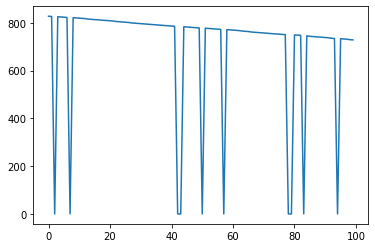

In [10]:
message_data['counter'].plot()

<AxesSubplot:>

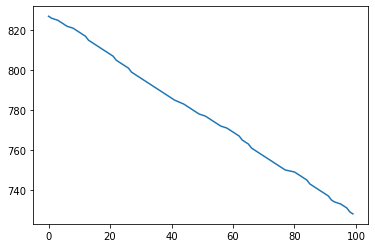

In [11]:
message_data[message_data['action'] == 'reed_counter'].counter.plot()

In [12]:
message_data.index = message_data.created
message_data.index = pd.to_datetime(message_data.index)
message_data

,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,counter,mode,temperature,_merge
created,,,,,,,,,,,,,
2021-04-15 04:52:29.306000+00:00,6077c68d02ab2e5243dd11aa,1618462347,data_bidir,697,2203AAB,2021-04-15T04:52:29.306Z,0,reed_counter,0,827,reed_counter,0,both
2021-04-15 04:51:27.692000+00:00,6077c64f02ab2e5243dd0dc4,1618462286,data_bidir,696,2203AAB,2021-04-15T04:51:27.692Z,0,reed_counter,0,826,reed_counter,0,both
2021-04-14 23:50:45.702000+00:00,60777fd502ab2e5243d88ec1,1618444244,data_bidir,695,2203AAB,2021-04-14T23:50:45.702Z,0,heartbeat_2,2.9,0,reed_counter,2.5,both
2021-04-14 17:17:56.514000+00:00,607723c44a4e60184ae45b5e,1618420675,data_bidir,694,2203AAB,2021-04-14T17:17:56.514Z,0,reed_counter,0,825,reed_counter,0,both
2021-04-14 15:57:50.110000+00:00,607710fe02ab2e5243ce1e22,1618415869,data_bidir,693,2203AAB,2021-04-14T15:57:50.110Z,0,reed_counter,0,824,reed_counter,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12 13:43:52.905000+00:00,60744e98914447151b7b08cd,1618235031,data_bidir,602,2203AAB,2021-04-12T13:43:52.905Z,0,reed_counter,0,733,reed_counter,0,both
2021-04-12 13:42:51.400000+00:00,60744e5b3625b3466a85baed,1618234970,data_bidir,601,2203AAB,2021-04-12T13:42:51.400Z,0,reed_counter,0,732,reed_counter,0,both
2021-04-12 13:40:49.372000+00:00,60744de1914447151b7afb02,1618234846,data_bidir,600,2203AAB,2021-04-12T13:40:49.372Z,0,reed_counter,0,731,reed_counter,0,both


In [17]:
message_data[message_data['action'] == 'reed_counter'].counter.resample('W').plot(figsize=(15,7))

created
2021-04-15 04:52:29.306000+00:00    827
2021-04-15 04:51:27.692000+00:00    826
2021-04-14 17:17:56.514000+00:00    825
2021-04-14 15:57:50.110000+00:00    824
2021-04-14 15:56:48.821000+00:00    823
                                   ... 
2021-04-12 13:43:52.905000+00:00    733
2021-04-12 13:42:51.400000+00:00    732
2021-04-12 13:40:49.372000+00:00    731
2021-04-12 13:03:40.387000+00:00    729
2021-04-12 12:58:31.441000+00:00    728
Name: counter, Length: 90, dtype: int32

drive api (testing still)

In [14]:
# pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

ModuleNotFoundError: No module named 'pydrive'

In [ ]:
# Rename the downloaded JSON file to client_secrets.json
# The client_secrets.json file needs to be in the same directory as the script.
gauth = GoogleAuth()
drive = GoogleDrive(gauth)
# List files in Google Drive
fileList = drive.ListFile({'q': "'1pxYux33QnFcvrpP17Q88_xY1nW79aJL-' in parents and trashed=false"}).GetList()
# for file1 in fileList:
#   print('title: %s, id: %s' % (file1['title'], file1['id']))

  

In [ ]:
fileCons = list()

for file1 in fileList:
  if 'downloadUrl' in file1:
    fileCons.append(requests.get(file1['downloadUrl']).content)
  else:
    print('unsupported file')

In [ ]:
print(fileCons)